In [1]:
import g3lhalo
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl

In [2]:
model=g3lhalo.halomodel(1e-4, 1e7, 0.001, 2, 1e10, 1e17)

model.set_cosmo(0.28, 0.046, 0.67, 0.8, 0.96)
h=0.67




# Halo Profile

In [3]:
# NFW Profile
cmfunc=ccl.halos.ConcentrationKlypin11()
model.set_concentration_mass_relation(cmfunc)


ks=np.geomspace(1e-1, 1e4)
m1=1e11/h
m2=1e16/h
u1=model.u_NFW(ks, m1, 0, 1.)
u2=model.u_NFW(ks, m2, 0, 1.)


Text(0, 0.5, '$\\hat{u}(k, m)$')

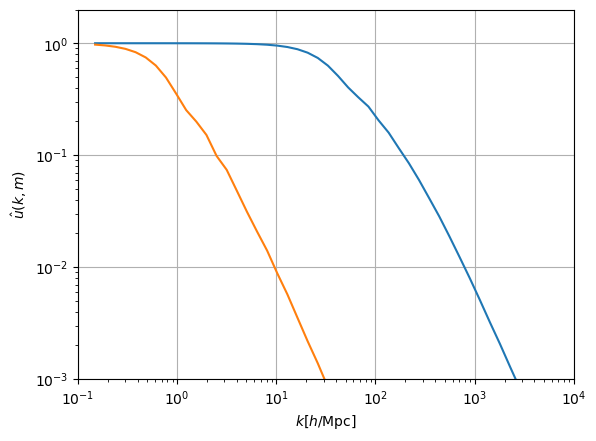

In [4]:

plt.xlim(1e-1, 1e4)
plt.ylim(1e-3, 2)

plt.loglog(ks/h, u1)
plt.loglog(ks/h, u2)
plt.grid()

plt.xlabel(r'$k [h/\mathrm{Mpc}]$')
plt.ylabel(r'$\hat{u}(k, m)$')

# Halo bias

In [5]:
# halo profile
hbf=ccl.halos.HaloBiasSheth01()
model.set_halobias(hbf)

ms= np.geomspace(1e10, 1e16)*h
bs=model.bh(ms, 0)

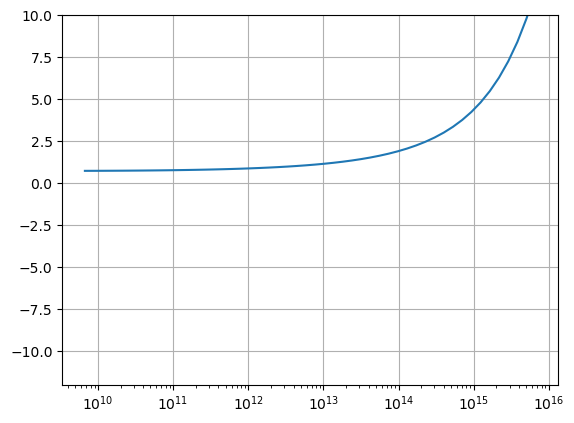

In [6]:
plt.xscale('log')
plt.ylim(-12, 10)
plt.plot(ms, bs)
plt.grid()

# HOD

In [7]:
# HOD

alpha=1
sigma=0.2
Mth=1e12/h
Mprime=20*Mth
beta=1

hod_cen, hod_sat = g3lhalo.HOD_Zheng(alpha, Mth, sigma, Mprime, beta)

model.set_hods(hod_cen, hod_sat)

ms=np.geomspace(1e10, 1e16)

Ncen=model.hod_cen1(ms)
Nsat=model.hod_sat1(ms)

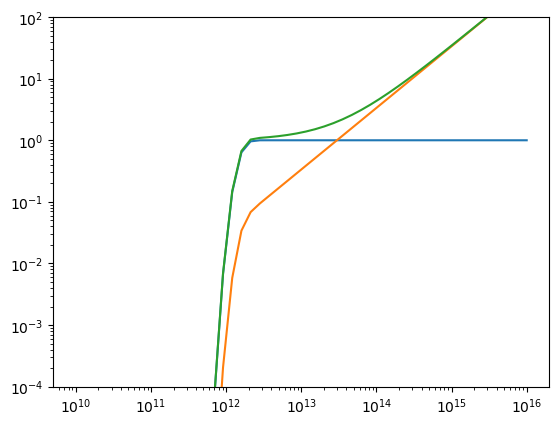

In [8]:
plt.ylim(1e-4, 100)
plt.loglog(ms, Ncen)
plt.loglog(ms, Nsat)
plt.loglog(ms, Ncen+Nsat)

# Linear Matter Power spectrum

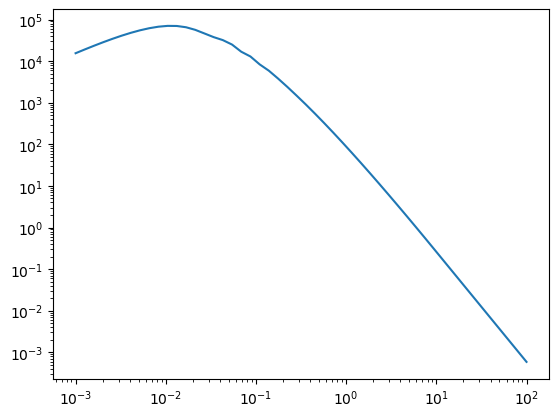

In [9]:
ks=np.geomspace(1e-3, 1e2)

Pk=model.pk_lin(ks, 0)

plt.loglog(ks, Pk)

# Galaxy Power Spectrum

In [10]:

hmf=ccl.halos.MassFuncSheth99()
model.set_hmf(hmf)

P1h_ll, P2h_ll, P_ll = model.lens_lens_ps(ks, 0, type1=1, type2=1)

ks=np.geomspace(1e-2, 100)*h

conversion=ks**3/2/np.pi/np.pi

In [11]:
pk=model.pk_lin(ks, 0)

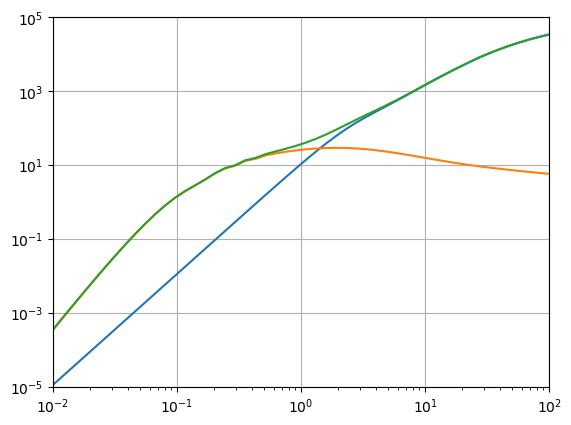

In [12]:
plt.ylim(1e-5, 1e5)
plt.xlim(1e-2, 100)
plt.loglog(ks/h, P1h_ll*conversion)
plt.loglog(ks/h, P2h_ll*conversion)

plt.loglog(ks/h, P_ll*conversion)

plt.grid()

# Galaxy - Matter Power spectrum

In [13]:
P1h_sl, P2h_sl, P_sl = model.source_lens_ps(ks, 0, type=1)

ks=np.geomspace(1e-2, 100)*h

/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:301: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral1.append(integrate.quad(kernel, self.mmin, self.mmax)[0])


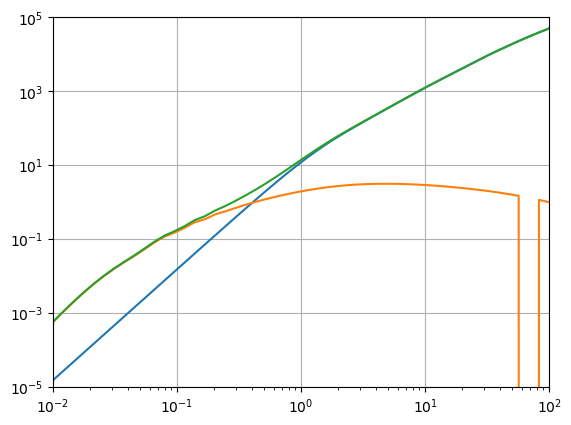

In [14]:
plt.ylim(1e-5, 1e5)
plt.xlim(1e-2, 100)
plt.loglog(ks/h, P1h_sl*ks**3/2/np.pi/np.pi)
plt.loglog(ks/h, P2h_sl*ks**3/2/np.pi/np.pi)
plt.loglog(ks/h, P_sl*ks**3/2/np.pi/np.pi)
plt.grid()

# Galaxy-Galaxy-Matter Bispectrum

In [15]:
ks=np.geomspace(1e-2, 100)*h

B1h_sll=[]
B2h_sll=[]
B3h_sll=[]
B_sll=[]

for k in ks:
    B1h, B2h, B3h, B = model.source_lens_lens_bs(k, k, k, 0,  1, 1)
    B1h_sll.append(B1h)
    B2h_sll.append(B2h)
    B3h_sll.append(B3h)
    B_sll.append(B)

B1h_sll=np.array(B1h_sll)
B2h_sll=np.array(B2h_sll)
B3h_sll=np.array(B3h_sll)
B_sll=np.array(B_sll)


/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:350: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  summand2 = integrate.quad(kernel, self.mmin, self.mmax)[0]
/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  summand3 = integrate.quad(kernel, self.mmin, self.mmax)[0]
/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(kernel, self.mmin, self.mmax)[0]
/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral *= integrate.quad(kernel, self.mmin, self.mmax)[0]
/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:329: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement i

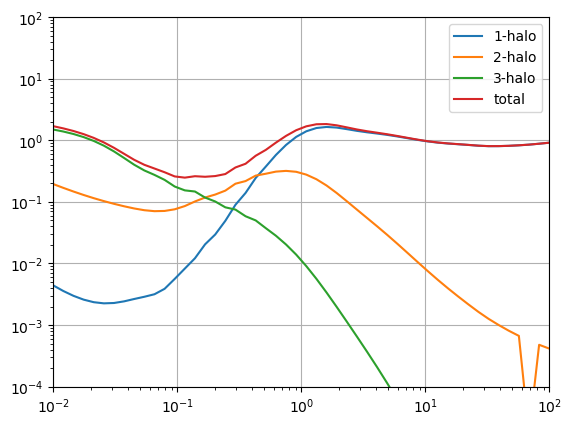

In [23]:
Q1h_sll=B1h_sll/(P_sl**2+2*P_ll*P_sl)
Q2h_sll=B2h_sll/(P_sl**2+2*P_ll*P_sl)
Q3h_sll=B3h_sll/(P_sl**2+2*P_ll*P_sl)
Q_sll=B_sll/(P_sl**2+2*P_ll*P_sl)




plt.xlim(1e-2, 100)
plt.ylim(1e-4, 100)
plt.loglog(ks/h, Q1h_sll, label='1-halo')
plt.loglog(ks/h, Q2h_sll, label='2-halo')
plt.loglog(ks/h, Q3h_sll, label='3-halo')
plt.loglog(ks/h, Q_sll, label='total')
plt.legend()
plt.grid()

